# 1. Visualization

We try to use this sample code to visualize the distribution of sales across products.
https://stackoverflow.com/questions/66009115/3d-plot-of-multiple-time-series-in-python

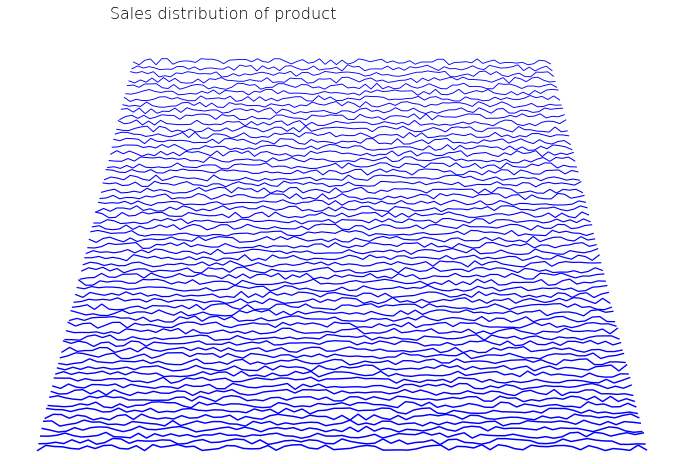

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = np.random.uniform(0, 1, (64, 75))

def dataDistribution(data, filename='', spacing=1, scale_down=1, lw_init=1.5):
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    # Create new Figure with black background
    fig = plt.figure(figsize=(12, 8))

    # Add a subplot with no frame
    ax = plt.subplot(111, frameon=False)

    # Generate random data
    data = data
    X = np.linspace(-1, 1, data.shape[-1])

    # Generate line plots
    lines = []
    for i in range(len(data)):
        # Small reduction of the X extents to get a cheap perspective effect
        xscale = 1 - i / 200.
        # Same for linewidth (thicker strokes on bottom)
        lw = lw_init - i / 100.0
        line, = ax.plot(xscale * X, i*spacing + data[i]/scale_down, color="b", lw=lw)
        lines.append(line)

    # Set y limit (or first line is cropped because of thickness)
    ax.set_ylim(-1, 70)

    # No ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # 2 part titles to get different font weights
    ax.text(0.5, 1.0, "Sales distribution of product ", transform=ax.transAxes,
            ha="right", va="bottom", color="k",
            family="sans-serif", fontweight="light", fontsize=16)
    ax.text(0.5, 1.0, filename, transform=ax.transAxes,
            ha="left", va="bottom", color="k",
            family="sans-serif", fontweight="bold", fontsize=16)
    
    # plt.show()
    if filename:
        plt.savefig('../images/'+filename+'.png')
    
dataDistribution(data)

# 2. Distribution of a single product across stores

In [2]:
import pandas as pd
validation_data = pd.read_csv('../data/raw/walmart_sales_data/sales_train_validation.csv')
products_HOBBIES_1_001 = validation_data[validation_data["item_id"]=="HOBBIES_1_001"]
products_HOBBIES_1_001.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
3049,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,...,0,0,1,2,0,4,0,0,2,2
6098,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,...,0,2,4,0,1,1,1,0,3,3
9147,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,0,0,0,0,...,1,0,0,1,0,1,0,1,2,1
12196,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


In [3]:
products_HOBBIES_1_001 = products_HOBBIES_1_001.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)
products_HOBBIES_1_001.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
3049,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,4,0,0,2,2
6098,0,0,0,0,0,0,0,0,0,0,...,0,2,4,0,1,1,1,0,3,3
9147,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,2,1
12196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


In [4]:
products_HOBBIES_1_001.shape

(10, 1913)

In [5]:
products_HOBBIES_1_001_values = products_HOBBIES_1_001[:].values
print(products_HOBBIES_1_001_values)

[[0 0 0 ... 0 1 1]
 [0 0 0 ... 0 2 2]
 [0 0 0 ... 0 3 3]
 ...
 [0 0 0 ... 2 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


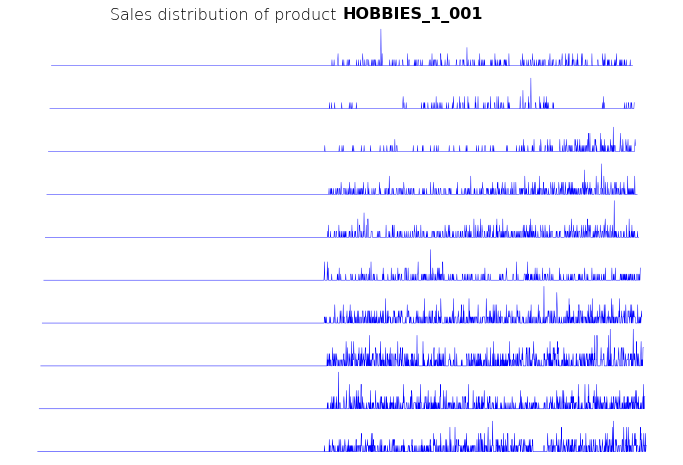

In [6]:
dataDistribution(products_HOBBIES_1_001_values, "HOBBIES_1_001", 7, lw_init=0.5)

In [7]:
products_HOUSEHOLD_1_001 = validation_data[validation_data["item_id"]=="HOUSEHOLD_1_001"]
products_HOUSEHOLD_1_001 = products_HOUSEHOLD_1_001.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)
products_HOUSEHOLD_1_001_values = products_HOUSEHOLD_1_001[:].values

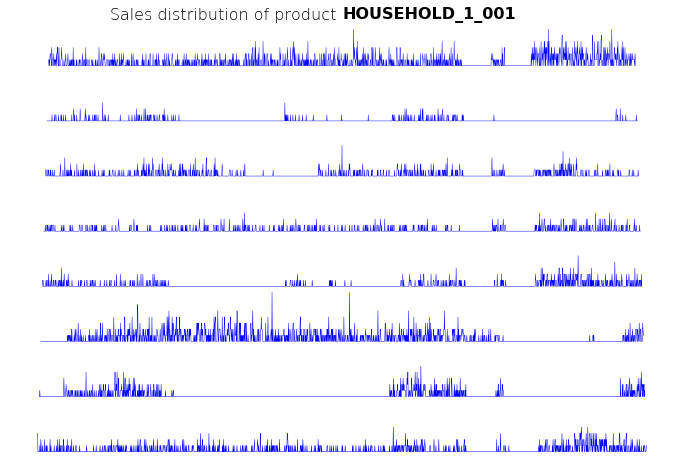

In [8]:
dataDistribution(products_HOUSEHOLD_1_001_values, "HOUSEHOLD_1_001", 9, lw_init=0.5)

In [9]:
products_FOODS_1_001 = validation_data[validation_data["item_id"]=="FOODS_1_001"]
products_FOODS_1_001 = products_FOODS_1_001.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)
products_FOODS_1_001_values = products_FOODS_1_001[:].values

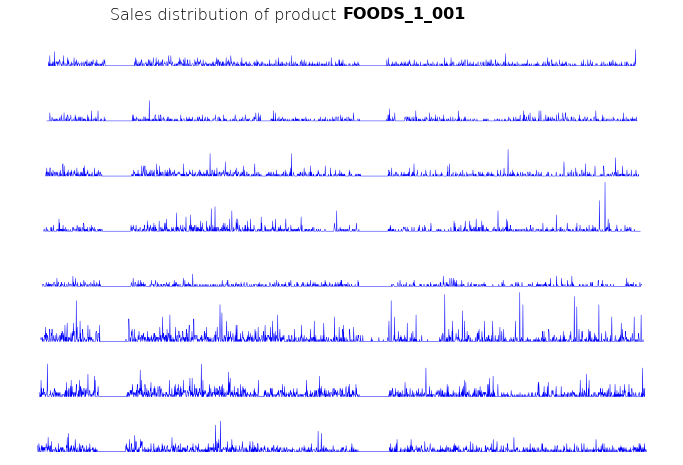

In [10]:
dataDistribution(products_FOODS_1_001_values, "FOODS_1_001", 9, scale_down=3, lw_init=0.5)

# 3. Distribution of multiple products in a single store

In [11]:
products_CA_1_HOBBIES = validation_data[((validation_data["item_id"]=="HOBBIES_1_001") |
                                (validation_data["item_id"]=="HOBBIES_1_100") |
                                (validation_data["item_id"]=="HOBBIES_1_200") |
                                (validation_data["item_id"]=="HOBBIES_1_300") |
                                (validation_data["item_id"]=="HOBBIES_1_400")) &
                                (validation_data["store_id"]=="CA_1")]
products_CA_1_HOBBIES.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
96,HOBBIES_1_100_CA_1_validation,HOBBIES_1_100,HOBBIES_1,HOBBIES,CA_1,CA,1,2,2,1,...,2,3,1,3,0,0,1,1,1,1
193,HOBBIES_1_200_CA_1_validation,HOBBIES_1_200,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,0,2,0,0,0,0,0
291,HOBBIES_1_300_CA_1_validation,HOBBIES_1_300,HOBBIES_1,HOBBIES,CA_1,CA,2,2,1,4,...,0,1,2,1,2,0,0,0,2,2
391,HOBBIES_1_400_CA_1_validation,HOBBIES_1_400,HOBBIES_1,HOBBIES,CA_1,CA,2,3,0,2,...,0,0,0,0,0,0,1,0,3,2


In [12]:
products_CA_1_HOBBIES = products_CA_1_HOBBIES.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)

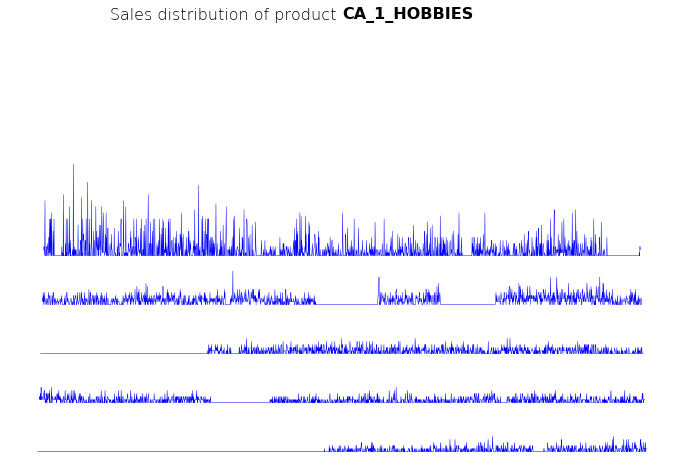

In [13]:
products_CA_1_HOBBIES_values = products_CA_1_HOBBIES[:].values
dataDistribution(products_CA_1_HOBBIES_values, "CA_1_HOBBIES", 8, scale_down=2, lw_init=0.5)

In [14]:
products_CA_1_HOUSEHOLD = validation_data[((validation_data["item_id"]=="HOUSEHOLD_1_001") |
                                (validation_data["item_id"]=="HOUSEHOLD_1_100") |
                                (validation_data["item_id"]=="HOUSEHOLD_1_200") |
                                (validation_data["item_id"]=="HOUSEHOLD_1_300") |
                                (validation_data["item_id"]=="HOUSEHOLD_1_400")) &
                                (validation_data["store_id"]=="CA_1")]
products_CA_1_HOUSEHOLD.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
565,HOUSEHOLD_1_001_CA_1_validation,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,3,0,0,0,...,1,0,1,1,1,0,0,0,0,1
661,HOUSEHOLD_1_100_CA_1_validation,HOUSEHOLD_1_100,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,1,2,1,1,1,2,2,0,2,3
760,HOUSEHOLD_1_200_CA_1_validation,HOUSEHOLD_1_200,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,0,1,1,3,0,1,1,1,0
858,HOUSEHOLD_1_300_CA_1_validation,HOUSEHOLD_1_300,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
955,HOUSEHOLD_1_400_CA_1_validation,HOUSEHOLD_1_400,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
products_CA_1_HOUSEHOLD = products_CA_1_HOUSEHOLD.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)

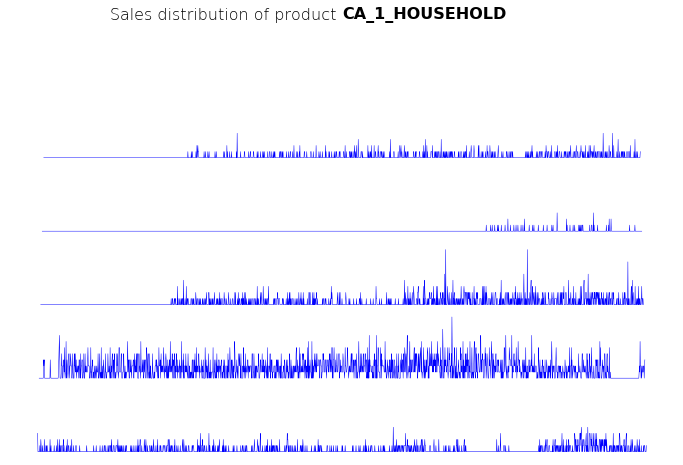

In [16]:
products_CA_1_HOUSEHOLD_values = products_CA_1_HOUSEHOLD[:].values
dataDistribution(products_CA_1_HOUSEHOLD_values, "CA_1_HOUSEHOLD", 12, scale_down=1, lw_init=0.5)

In [17]:
products_CA_1_FOODS = validation_data[((validation_data["item_id"]=="FOODS_1_001") |
                                (validation_data["item_id"]=="FOODS_1_002") |
                                (validation_data["item_id"]=="FOODS_1_003") |
                                (validation_data["item_id"]=="FOODS_1_004") |
                                (validation_data["item_id"]=="FOODS_1_005")) &
                                (validation_data["store_id"]=="CA_1")]
products_CA_1_FOODS.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0,0,1,...,0,2,0,4,1,1,0,1,1,0
1613,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,0,1,0,1,...,1,3,1,0,0,1,2,0,0,0
1614,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,3,0,2,1,1,0,1,0,1,0
1615,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1616,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,3,9,3,3,...,3,1,1,2,0,2,2,1,4,1


In [18]:
products_CA_1_FOODS = products_CA_1_FOODS.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)

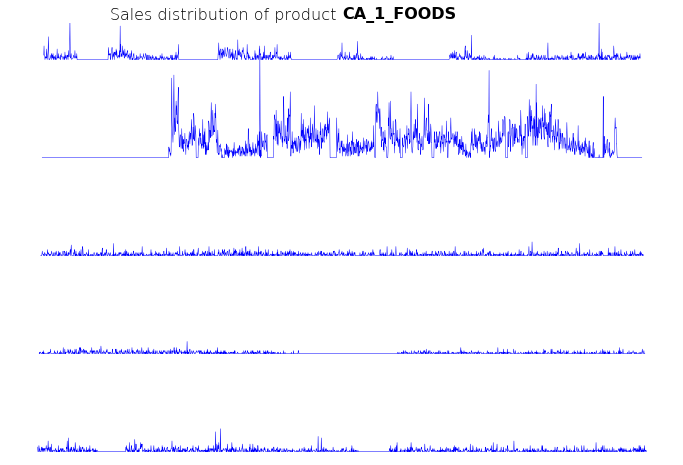

In [19]:
products_CA_1_FOODS_values = products_CA_1_FOODS[:].values
dataDistribution(products_CA_1_FOODS_values, "CA_1_FOODS", 16, scale_down=4, lw_init=0.5)